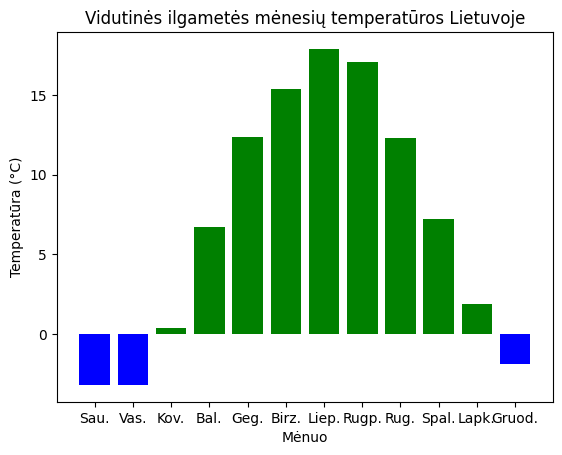

In [4]:
# nubraižykite stulpelinę diagramą, kur būtų 
# atvaizduotos vidutinės ilgametės mėnesių temperatūros
# mėlynas stulpelis turi rodyti neigiamą temperatūrą
# žalias - teigiamą
import numpy as np
import matplotlib.pyplot as plt

labels = ['Sau.', 'Vas.', 'Kov.', 'Bal.', 'Geg.', 'Birz.', 'Liep.', 'Rugp.', 'Rug.', 'Spal.', 'Lapk.', 'Gruod.']
b = [-3.2, -3.2, 0.4, 6.7, 12.4, 15.4, 17.9, 17.1, 12.3, 7.2, 1.9, -1.9]

# Setting colors for each bar based on the temperature value
clrs = ['blue' if temp < 0 else 'green' for temp in b]

# Create the bar chart
fig, axis = plt.subplots()
axis.bar(labels, b, color=clrs)

# Adding title and labels
plt.title('Vidutinės ilgametės mėnesių temperatūros Lietuvoje')
plt.xlabel('Mėnuo')
plt.ylabel('Temperatūra (°C)')

# Show the plot
plt.show()
    

In [3]:
pip install matplotlib numpy pandas seaborn 

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.9 kB 660.6 kB/s eta 0:00:01
     ------------------- ------------------- 81.9/165.9 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 4.0 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.0 MB 4.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.0 MB 5.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.0 MB 6.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.4/8.0 MB 6.5 MB/s eta 0:00:02
   -------- ------------------------------- 1.7/8.0 MB 6.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/8.0 MB 6.4 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.0 MB 6.6 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


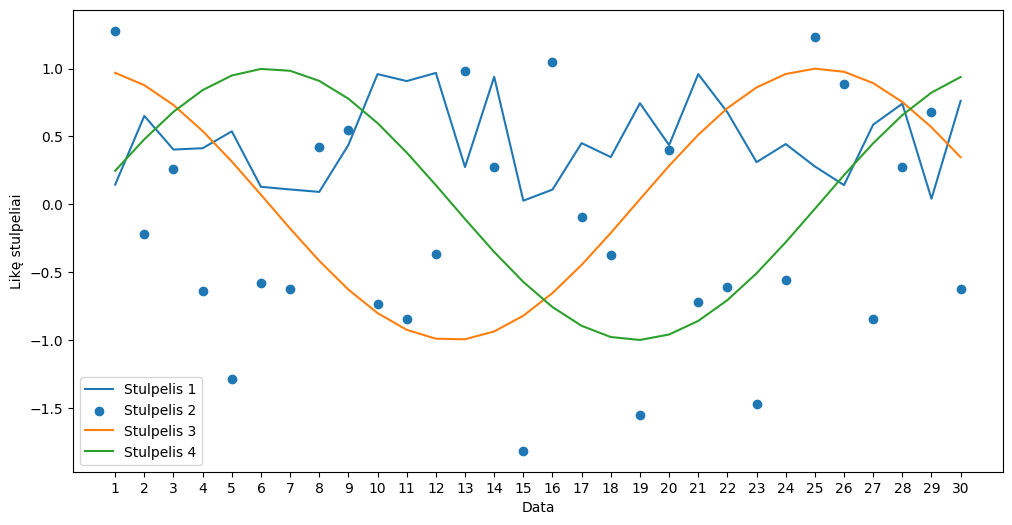

In [2]:
#nuskaityti ir atvaizduoti fpc.csv failo stulpelius grafiškai
#x- C1 stulpelis, y - visi kiti likę
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil import parser

class TxtReader:
    def __init__(self, filename, delimiter=',', skiprows=0, parse_dates=False, x_col=0):
        self.filename = filename
        self.delimiter = delimiter
        self.skiprows = skiprows
        self.parse_dates = parse_dates
        self.__x_col = x_col
        
        self._read_file()

    def _read_file(self):
        self.__x = []
        self.__y = []
        
        with open(self.filename, 'r') as file:
            reader = csv.reader(file, delimiter=self.delimiter)
            for i, row in enumerate(reader):
                if i < self.skiprows:
                    continue
                self.__x.append(row[self.__x_col])
                self.__y.append([float(value) for value in row[self.__x_col + 1:5]])  # Tik pirmi keturi y stulpeliai
        
        if self.parse_dates:
            self.__x = [self._parse_date(x) for x in self.__x]
        
        self.__y = np.array(self.__y, dtype=float)

    def _parse_date(self, date_str):
        try:
            return datetime.strptime(date_str, '%Y-%m-%d')
        except ValueError:
            return date_str
    
    def get_x(self):
        return self.__x
    
    def get_y(self):
        return self.__y

# Skaityti duomenis
filename = '../../DATA/fpc.csv'
reader = TxtReader(filename, skiprows=1, parse_dates=True)

x = reader.get_x()
y = reader.get_y()

# Nurodome, kokie grafikai turi būti naudojami
graph_types = ['plot', 'scatter', 'plot', 'plot']

# Piešti grafikus
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(y.shape[1]):
    if i < len(graph_types):
        if graph_types[i] == 'plot':
            ax.plot(x, y[:, i], label=f'Stulpelis {i+1}')
        elif graph_types[i] == 'scatter':
            ax.scatter(x, y[:, i], label=f'Stulpelis {i+1}')
    else:
        ax.plot(x, y[:, i], label=f'Stulpelis {i+1}')  # Pagal nutylėjimą linijinis grafikas

ax.set_xlabel('Data')
ax.set_ylabel('Likę stulpeliai')
ax.legend()
plt.show()

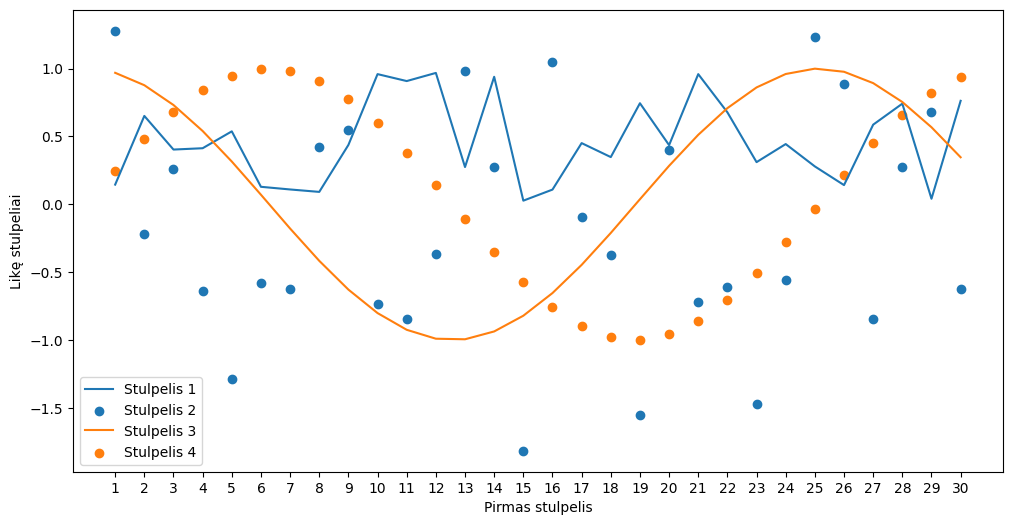

In [13]:
#nuskaityti ir atvaizduoti fpc.csv failo stulpelius grafiškai
#x- C1 stulpelis, y - visi kiti likę
#plot, scatter

import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil import parser

class TxtReader:
    def __init__(self, filename, delimiter=',', skiprows=0, parse_dates=False, x_col=0, y_cols=None):
        self.filename = filename
        self.delimiter = delimiter
        self.skiprows = skiprows
        self.parse_dates = parse_dates
        self.__x_col = x_col
        self.__y_cols = y_cols if y_cols is not None else [1]
        
        self._read_file()

    def _read_file(self):
        self.__x = []
        self.__y = [[] for _ in range(len(self.__y_cols))]
        
        with open(self.filename, 'r') as file:
            reader = csv.reader(file, delimiter=self.delimiter)
            for i, row in enumerate(reader):
                if i < self.skiprows:
                    continue
                self.__x.append(row[self.__x_col])
                for j, col in enumerate(self.__y_cols):
                    self.__y[j].append(row[col])
                
        if self.parse_dates:
            self.__x = [self._parse_date(x) for x in self.__x]
        
        self.__y = [np.array(y, dtype=float) for y in self.__y]

    def _parse_date(self, date_str):
        try:
            return datetime.strptime(date_str, '%Y-%m-%d')
        except ValueError:
            return date_str 

    def get_x(self):
        return self.__x
    
    def get_y(self, index):
        return self.__y[index]

# Sukurti objektus
o1 = TxtReader('../../DATA/fpc.csv', skiprows=1, parse_dates=True, y_cols=[1])
o2 = TxtReader('../../DATA/fpc.csv', skiprows=1, parse_dates=True, y_cols=[2])
o3 = TxtReader('../../DATA/fpc.csv', skiprows=1, parse_dates=True, y_cols=[3])
o4 = TxtReader('../../DATA/fpc.csv', skiprows=1, parse_dates=True, y_cols=[4])

# Gauti duomenis
x = o1.get_x()
y1 = o1.get_y(0)
y2 = o2.get_y(0)
y3 = o3.get_y(0)
y4 = o4.get_y(0)

# Piešti grafikus
fig, ax = plt.subplots(figsize=(12, 6))

# Pirmas grafikas - plot
ax.plot(x, y1, label='Stulpelis 1')

# Antras grafikas - scatter
ax.scatter(x, y2, label='Stulpelis 2')

# Trečias grafikas - plot
ax.plot(x, y3, label='Stulpelis 3')

# Ketvirtas grafikas - scatter
ax.scatter(x, y4, label='Stulpelis 4')

ax.set_xlabel('Pirmas stulpelis')
ax.set_ylabel('Likę stulpeliai')
ax.legend()
plt.show()
        

C:\Users\eleta\AppData\Local\Temp\ipykernel_21096\2223461108.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


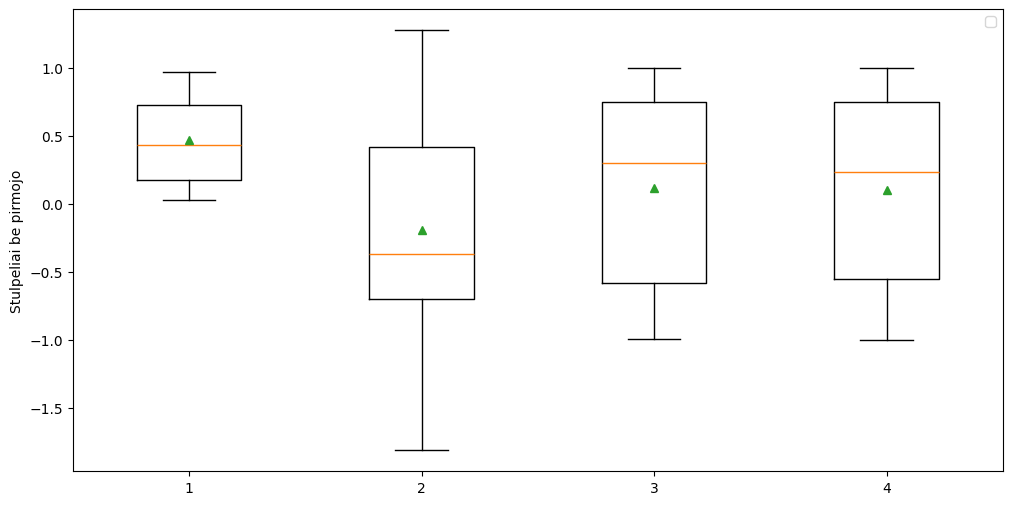

In [14]:
#nuskaityti ir atvaizduoti fpc.csv failo stulpelius grafiškai su box plotais
# Informacija pateikta C2-C5 stulpeliuose y 

import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil import parser

class TxtReader:
    def __init__(self, filename, delimiter=',', skiprows=0, parse_dates=False, x_col=0, y_cols=None):
        self.filename = filename
        self.delimiter = delimiter
        self.skiprows = skiprows
        self.parse_dates = parse_dates
        self.__x_col = x_col
        self.__y_cols = y_cols if y_cols is not None else [1]
        
        self._read_file()

    def _read_file(self):
        self.__x = []
        self.__y = [[] for _ in range(len(self.__y_cols))]
        
        with open(self.filename, 'r') as file:
            reader = csv.reader(file, delimiter=self.delimiter)
            for i, row in enumerate(reader):
                if i < self.skiprows:
                    continue
                self.__x.append(row[self.__x_col])
                for j, col in enumerate(self.__y_cols):
                    self.__y[j].append(row[col])
                
        if self.parse_dates:
            self.__x = [self._parse_date(x) for x in self.__x]
        
        self.__y = [np.array(y, dtype=float) for y in self.__y]

    def _parse_date(self, date_str):
        try:
            return datetime.strptime(date_str, '%Y-%m-%d')
        except ValueError:
            return date_str 

    def get_x(self):
        return self.__x
    
    def get_y(self, index):
        return self.__y[index]

# Sukurti objektus
o1 = TxtReader('../../DATA/fpc.csv', skiprows=1, parse_dates=True, y_cols=[1])
o2 = TxtReader('../../DATA/fpc.csv', skiprows=1, parse_dates=True, y_cols=[2])
o3 = TxtReader('../../DATA/fpc.csv', skiprows=1, parse_dates=True, y_cols=[3])
o4 = TxtReader('../../DATA/fpc.csv', skiprows=1, parse_dates=True, y_cols=[4])

# Gauti duomenis
#x = o1.get_x()
y1 = o1.get_y(0)
y2 = o2.get_y(0)
y3 = o3.get_y(0)
y4 = o4.get_y(0)

# Piešti grafikus
fig, ax = plt.subplots(figsize=(12, 6))
data=(y1,y2,y3,y4)

# Stulpeliai
ax.boxplot(data, showmeans=True, showfliers=False)
ax.set_ylabel('Stulpeliai be pirmojo')
ax.legend()
plt.show()
        

C:\Users\eleta\AppData\Local\Temp\ipykernel_29288\3007331087.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90) # X asies dydzius pasukau 90 laipsniu kampu


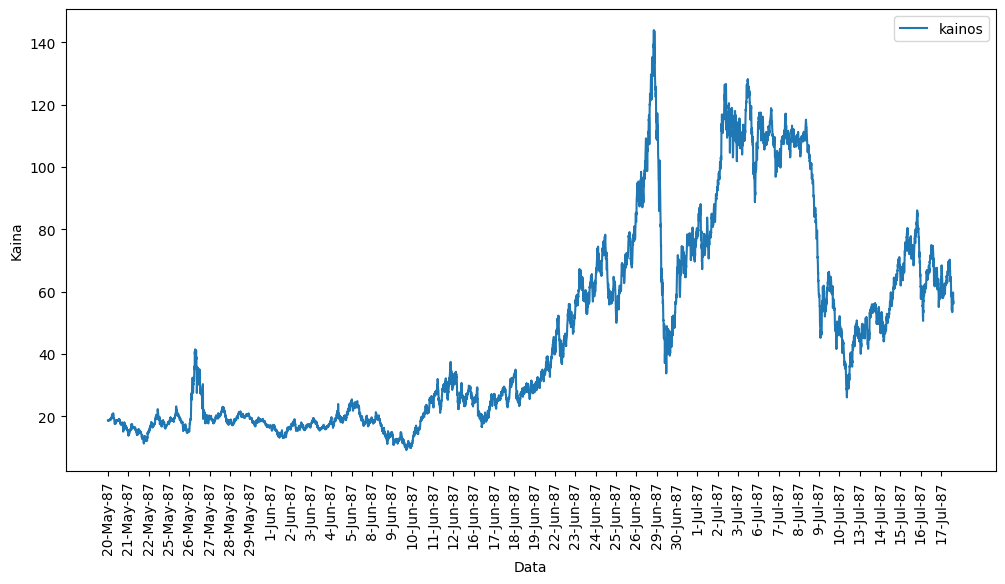

In [6]:
#Failas BrendOilPrice.csv. Padaryti du sarasus 
#x -data time is pirmo stulpelio, y -tiesiog float is antro stulpelio. 
#nubrezti plot grafika. Padaryta su TxtReader klase
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil import parser

class TxtReader:
    def __init__(self, filename, delimiter=',', skiprows=0, parse_dates=False, x_col=0, y_cols=None):
        self.filename = filename
        self.delimiter = delimiter
        self.skiprows = skiprows
        self.parse_dates = parse_dates
        self.__x_col = x_col
        self.__y_cols = y_cols if y_cols is not None else [1]
        
        self._read_file()

    def _read_file(self):
        self.__x = []
        self.__y = [[] for _ in range(len(self.__y_cols))]
        
        with open(self.filename, 'r') as file:
            reader = csv.reader(file, delimiter=self.delimiter)
            for i, row in enumerate(reader):
                if i < self.skiprows:
                    continue
                self.__x.append(row[self.__x_col])
                for j, col in enumerate(self.__y_cols):
                    self.__y[j].append(row[col])
                
        if self.parse_dates:
            self.__x = [self._parse_date(x) for x in self.__x]
        
        self.__y = [np.array(y, dtype=float) for y in self.__y]

    def _parse_date(self, date_str):
        try:
            return datetime.strptime(date_str, '%Y-%m-%d')
        except ValueError:
            return date_str 

    def get_x(self):
        return self.__x
    
    def get_y(self, index):
        return self.__y[index]

# Sukurti objektus
o1 = TxtReader('../../DATA/BrentOilPrices.csv', skiprows=1, parse_dates=True)
o2 = TxtReader('../../DATA/BrentOilPrices.csv', skiprows=1, parse_dates=False, y_cols=[1])


# Gauti duomenis
x = o1.get_x()
y1 = o1.get_y(0)


# Piešti grafikus
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, y1, label='kainos')

ax.set_xlabel('Data')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) # X asies dydzius pasukau 90 laipsniu kampu
total_data_points = len(x)
ticks = np.arange(0, total_data_points, 200)  # Ant x asies bus atidetas kas šimtas skaičius
ax.set_xticks(ticks)
ax.set_ylabel('Kaina')
ax.legend()
plt.show()

    

C:\Users\eleta\AppData\Local\Temp\ipykernel_29288\1639234664.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


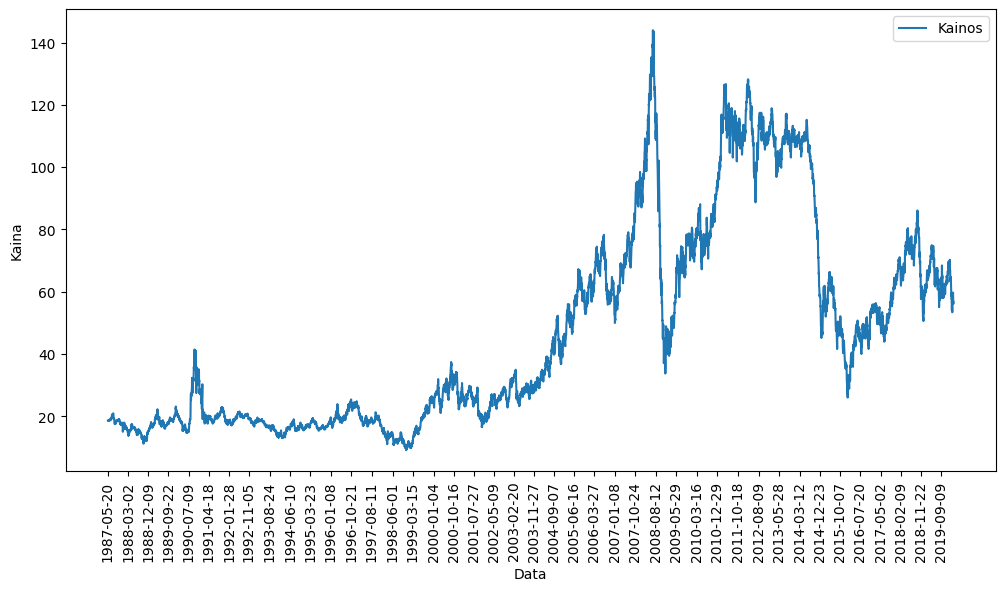

In [11]:
#Failas BrendOilPrice.csv. Padaryti du sarasus 
#x -data time is pirmo stulpelio, y -tiesiog float is antro stulpelio. 
#nubrezti plot grafika.

import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil import parser

def oil_price(filename):
    # Nuskaityti failą
    x = []
    y = []
    with open(filename, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Data time iš pirmo stulpelio
            date_time = parser.parse(row['Date'])
            x.append(date_time)
            # Float iš antro stulpelio
            price = float(row['Price'])
            y.append(price)
    return x, y

# Pavyzdinis kvietimas
file_path = '../../DATA/BrentOilPrices.csv'
x, y = oil_price(file_path)

# Grafiko braizymas
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, y, label='Kainos')

ax.set_xlabel('Data')
ax.set_ylabel('Kaina')
ax.legend()

# X ašies dydžius pasukame 90 laipsnių kampu
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Nustatome x ašies žymėjimus kas 200 duomenų taškų
total_data_points = len(x)
ticks = np.arange(0, total_data_points, 200)
#ax.set_xticks(ticks) Siuo atveju nubraizo grafika, kuriame irasai nesutampa su reiksmemis. Grafikas pastumtas. del skirtingos indeksacijos.
ax.set_xticks([x[i] for i in ticks]) #Uztikriname, kad =y tikrai atitiks savo x
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in ticks])

plt.show()